## 作業1：

### 請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

我選擇的是 Kaggle Dataset 上的 Google Play Store Apps Dataset，這是一筆記錄 Google Play Store 相關資訊的資料集。

資料來源:(https://www.kaggle.com/lava18/google-play-store-apps)

### 1. 你選的這組資料為何重要

這筆資料並不重要，不會影響世界、不具強科學意義，也沒有高經濟價值，但其直覺且生活化，會讓我想去探討這筆資料。

現在 Kaggle 上的競賽多數為企業提供，資料量大、變數複雜且不易理解，即便預測結果不錯，也很難從中找出並驗證實際上的價值。
相比於前者，這筆資料簡單直覺且生活化，變數不需強大的專業知識也可以理解，是一筆容易入手的資料集。

我喜歡探索生活化的資料集，這可以讓我在分析時找到許多樂趣，並可以自己構築許多有趣的猜想，這是我選擇這筆資料的原因。

### 2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

提供者為 Lavanya Gupta，一個印度的軟體工程師。她使用網頁抓取的方式蒐集了 Google Play Store 上的公開數據資料。

### 3. 蒐集而來的資料型態為何

此 Dataset 包含兩筆資料，皆為整理的相當完整的結構化資料

Google Play App 的相關資訊: 包含 App 的名稱、平均評分跟上次更新的時間等等，共 13 個變數，資料型態包含類別、數值與時間。

Google Play 使用者的評論資訊: 記錄了使用者對各個 App 的評論，並將評論以一些類別歸納(感性、主觀等等)，包含 App 名稱、評論共 5 個變數。

### 4. 這組資料想解決的問題如何評估

提供者並沒有寫死問題，而是讓分析者自由發揮。從商業性質出發，也許可以找出熱門 App 的關聯性，開發或推廣具高商業價值的產品。

相較於產品的高下載量，我會更在易產品的評分，我初步希望可以由扣除名稱外的變數對評分進行迴歸模型，並使用 MSE 評估模型結果好壞，最後再加入使用者評論來對模型結果進行解釋。

## 作業2：

### 想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

### 1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

業績包含載客數與客人消費能力，載客數少但車車遠程的業績不一定較差，需要一起評估，可以先以每小時平均收入當作目標來進行分析。

根據直觀的想法，我假設自由載客司機的每小時平均收入與時間、地點、天氣有關，且需考慮這三者的交互影響。

我也假設分析前後各情況下的供給與需求並不會發生巨大改變，且司機不會影響載客收入。

目標為找出在不同時間、天氣下，推薦平均收入最高的地點給司機。

Ex: 週六傍晚下雨天，新竹縣平均收入最高的地方為喜來登飯店(許多開完研討會的人，想去高鐵站或機場，但下雨又不想等接駁車)

### 2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

天氣的資料可以從中央氣象局取得，也可以參考天氣預報，提前給出推薦地點。

平均收入可以由車隊司機的 GPS 與跳錶機取得，記錄跳錶收入、開始時間與地點。

### 3. 蒐集而來的資料型態為何

結構性資料，每筆資料記錄每個司機每次載客的開始時間、總花費時間、載客地點與收入，還有當時的天氣，共 4 筆變數。

### 4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

以平均收入(收入/總花費時間)當作目標，以其它變數為解釋變數建立迴歸模型，可以由 MSE 來評估模型好壞。

另外關於假設驗證:

假設 1: 時間、地點、天氣與平均收入有關。這個假設其實很好驗證，可以各自與收入進行相關性比較，得之可能影響平均收入的程度。

假設 2: 各情況下的供給與需求並不會發生巨大改變。這個較難驗證，且很可能不滿足，畢竟環境、消費者習慣等等都可能隨著時間改變，一場大火或地震都可能讓一個觀光熱區瞬間門口羅雀，我建議發展一套模行監控機制，甚至定時手動或自動的更新模型，才能確保這個假設成立。

假設 3: 司機不會影響載客收入。因為是自由載客，司機的評價或車況應不會巨大影響收入，但若真的有顯著差異的話，建議根據個案評估，並討論是否增加蒐集的變數。

## 作業3
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_squared_error(y, y_hat):
    """
    calculation th mean square error
    
    Inputout:
    y: the vector of true value
    y_hat: the vector of prediction value
    
    Output:
    MSE(Mean Square Error) = average of (y-y_hat)^2
    """
    mse = sum((y - y_hat)**2) / len(y)
    return mse

def mean_absolute_error(y, y_hat):
    """
    calculation th mean absolute error
    
    Inputout:
    y: the vector of true value
    y_hat: the vector of prediction value
    
    Output:
    MAE(Mean Absolute Error) = average of |y-y_hat|
    """
    mae = sum(abs(y - y_hat)) / len(y)
    return mae

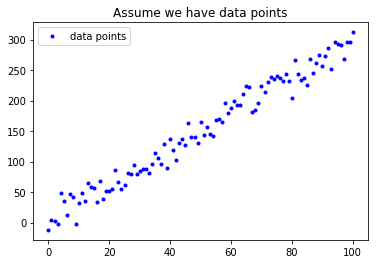

In [3]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

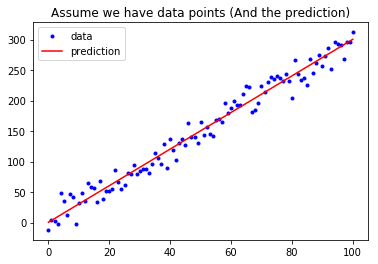

In [4]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [11]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 235.603
The Mean absolute error is 12.299
